# Simple River Discharge Analysis 🌊

## Welcome! 

Today we will learn how to analyze river water data using simple steps. Don't worry if you've never used Python before - just follow along!

### What we will do:
1. Look at river discharge data (how much water flows)
2. Calculate simple numbers like average
3. Make graphs to see the data
4. Find out about big floods and when they might happen

**Just copy and run each code box - we'll explain everything! 😊**

## Step 2: Get Ready

First, we need to tell Python what tools to use. Think of this like getting your calculator and pencils ready.

**Just run this box - don't worry about understanding it yet!**

In [ ]:
# These are our tools for working with data
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats

print("✅ Tools are ready to use!")

## Step 3: Read Our Data

Now let's read the data from our file. This is how you would use your own river data file.

In [58]:
# Read our data file
df = pd.read_csv('simple_river_data.csv')

print("✅ Data file loaded!")
print(df.head())

✅ Data file loaded!
   Year  River_Flow
0  1974       291.4
1  1975       499.7
2  1976       428.3
3  1977       249.4
4  1978       342.1


## Step 4: Simple Math with Our Data 🧮

Let's calculate some simple numbers to understand our river data:

- **Average (Mean)**: Add all numbers and divide by how many numbers we have
- **Middle Value (Median)**: The number in the middle when we sort from small to big
- **Biggest and Smallest**: The highest and lowest water flow we recorded

In [24]:
# Get just the river flow numbers
flows = df['River_Flow']

# Calculate simple statistics
average_flow = flows.mean()          # Average
middle_flow = flows.median()         # Middle value
biggest_flow = flows.max()           # Biggest
smallest_flow = flows.min()          # Smallest
how_spread_out = flows.std()         # How spread out the numbers are

print("🔢 SIMPLE STATISTICS FOR BLUE RIVER")
print("=" * 40)
print(f"Average flow:      {average_flow:.1f} cubic meters/second")
print(f"Middle flow:       {middle_flow:.1f} cubic meters/second")
print(f"Biggest flow:      {biggest_flow:.1f} cubic meters/second")
print(f"Smallest flow:     {smallest_flow:.1f} cubic meters/second")
print(f"How spread out:    {how_spread_out:.1f} cubic meters/second")

🔢 SIMPLE STATISTICS FOR BLUE RIVER
Average flow:      455.7 cubic meters/second
Middle flow:       414.3 cubic meters/second
Biggest flow:      1130.3 cubic meters/second
Smallest flow:     120.1 cubic meters/second
How spread out:    211.5 cubic meters/second


## Step 5: Is Our Data Lopsided? ⚖️

**Skewness** is a fancy word that tells us if our data is lopsided:
- If most numbers are small with a few big numbers = **Right-sided** (like most rivers!)
- If most numbers are big with a few small numbers = **Left-sided**
- If it's balanced = **Even on both sides**

In [25]:
# Calculate skewness (how lopsided our data is)
skewness = stats.skew(flows)

print("⚖️ IS OUR DATA LOPSIDED?")
print("=" * 25)
print(f"Skewness number: {skewness:.3f}")

if skewness > 0.5:
    print("\n📈 RIGHT-SIDED (Positive skew)")
    print("This means:")
    print("• Most years have normal water flow")
    print("• A few years have very high flow (floods)")
    print("• This is normal for rivers!")
elif skewness < -0.5:
    print("\n📉 LEFT-SIDED (Negative skew)")
    print("This means:")
    print("• Most years have high water flow")
    print("• A few years have very low flow (droughts)")
else:
    print("\n⚖️ BALANCED")
    print("This means:")
    print("• Data is fairly even on both sides")
    print("• Average and middle value are close")

print(f"\n🔍 Look: Average = {average_flow:.1f}, Middle = {middle_flow:.1f}")
if average_flow > middle_flow:
    print("The average is bigger than the middle - this shows our data is right-sided!")
else:
    print("The average and middle are close - our data is fairly balanced.")

⚖️ IS OUR DATA LOPSIDED?
Skewness number: 1.416

📈 RIGHT-SIDED (Positive skew)
This means:
• Most years have normal water flow
• A few years have very high flow (floods)
• This is normal for rivers!

🔍 Look: Average = 455.7, Middle = 414.3
The average is bigger than the middle - this shows our data is right-sided!


## Step 6: Make a Simple Graph 📊

Let's make a **histogram**. This is like a bar chart that shows us:
- How many years had low flow
- How many years had medium flow  
- How many years had high flow

It helps us "see" our data!

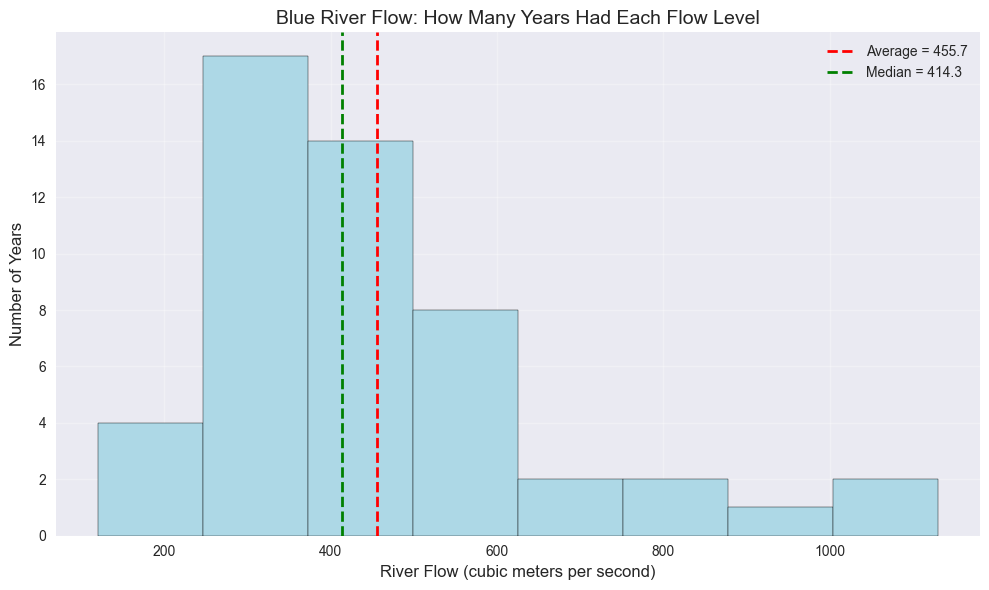

📊 What do you see in the graph?
• Most bars are on the left (lower flows)
• A few bars are on the right (higher flows = floods)
• This matches what we learned about right-sided data!


In [31]:
# Make a simple histogram
plt.figure(figsize=(10, 6))  # Size of our graph

# Create the histogram (like a bar chart)
plt.hist(flows, bins=8, color='lightblue', edgecolor='black')

# Add a line showing the average
plt.axvline(average_flow, color='red', linestyle='--', linewidth=2, 
           label=f'Average = {average_flow:.1f}')

# Add a line showing the middle value
plt.axvline(middle_flow, color='green', linestyle='--', linewidth=2, 
           label=f'Median = {middle_flow:.1f}')

# Make it look nice
plt.xlabel('River Flow (cubic meters per second)', fontsize=12)
plt.ylabel('Number of Years', fontsize=12)
plt.title('Blue River Flow: How Many Years Had Each Flow Level', fontsize=14)
plt.legend()  # Show what the lines mean
plt.grid(True, alpha=0.3)  # Add light grid lines

plt.tight_layout()
plt.show()

print("📊 What do you see in the graph?")
print("• Most bars are on the left (lower flows)")
print("• A few bars are on the right (higher flows = floods)")
print("• This matches what we learned about right-sided data!")

## Step 7: Try Different Distribution Shapes 📐

Now we want to find a mathematical "recipe" that matches our river data. We'll try 3 different recipes:

1. **Normal** - Like a bell shape (symmetric)
2. **Log-Normal** - Lopsided to the right (good for rivers)
3. **Gumbel** - Special recipe for extreme events like floods

Let's start with the **Normal** shape:

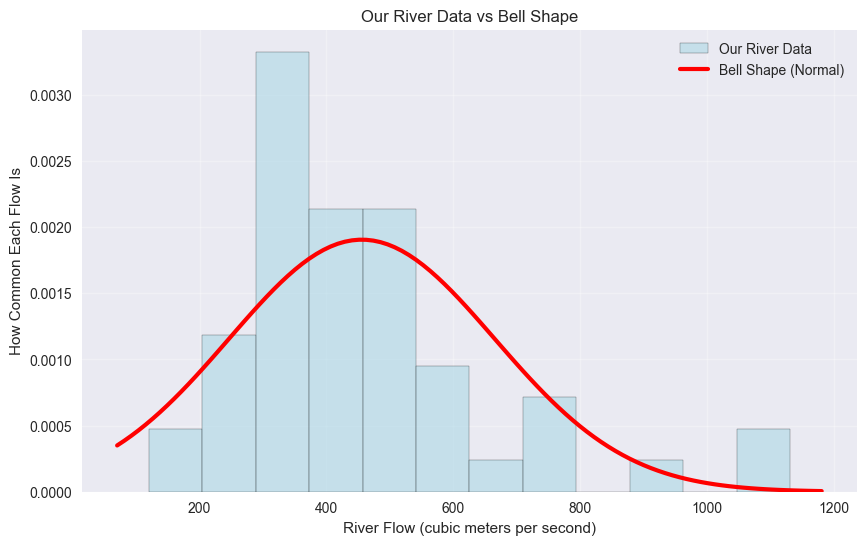

🤔 How does the red line match the blue bars?
If they don't match well, we need a different recipe!


In [43]:
# Try the Normal (bell-shaped) recipe
# This uses our average and "spread out" numbers
normal_average = average_flow
normal_spread = how_spread_out

# Make a smooth curve to show this recipe
plt.figure(figsize=(10, 6))

# Our data as bars
plt.hist(flows, bins=12, alpha=0.6, color='lightblue', edgecolor='black', 
         density=True, label='Our River Data')

# Create smooth curve for normal shape using fitted parameters
x_smooth = np.linspace(flows.min()-50, flows.max()+50, 100)
normal_params = stats.norm.fit(flows)  # Get fitted mean and std
normal_curve = stats.norm.pdf(x_smooth, *normal_params)
plt.plot(x_smooth, normal_curve, 'r-', linewidth=3, label='Bell Shape (Normal)')

plt.xlabel('River Flow (cubic meters per second)')
plt.ylabel('How Common Each Flow Is')
plt.title('Our River Data vs Bell Shape')
plt.legend()
plt.grid(True, alpha=0.3)
plt.show()

print("🤔 How does the red line match the blue bars?")
print("If they don't match well, we need a different recipe!")

## Step 8: Try the Log-Normal Shape 📈

The **Log-Normal** shape is naturally lopsided to the right - just like river data usually is!

📈 TRYING THE RIGHT-LOPSIDED SHAPE (LOG-NORMAL)
Python found the best recipe numbers for us!


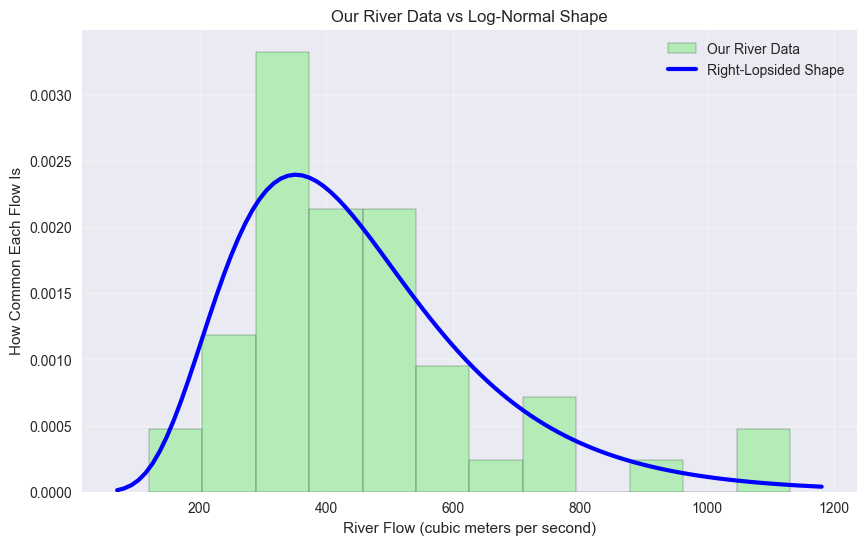

🤔 Does this blue line match better than the red line did?
This shape is often good for river data!


In [45]:
# Try the Log-Normal (right-lopsided) recipe
# Python figures out the best recipe numbers for us
lognorm_recipe = stats.lognorm.fit(flows)
lognorm_shape, lognorm_location, lognorm_scale = lognorm_recipe

print("📈 TRYING THE RIGHT-LOPSIDED SHAPE (LOG-NORMAL)")
print("=" * 45)
print("Python found the best recipe numbers for us!")

# Make the graph
plt.figure(figsize=(10, 6))

# Our data as bars
plt.hist(flows, bins=12, alpha=0.6, color='lightgreen', edgecolor='black', 
         density=True, label='Our River Data')

# Create smooth curve for log-normal shape
lognorm_curve = stats.lognorm.pdf(x_smooth, lognorm_shape, 
                                 loc=lognorm_location, scale=lognorm_scale)
plt.plot(x_smooth, lognorm_curve, 'b-', linewidth=3, label='Right-Lopsided Shape')

plt.xlabel('River Flow (cubic meters per second)')
plt.ylabel('How Common Each Flow Is')
plt.title('Our River Data vs Log-Normal Shape')
plt.legend()
plt.grid(True, alpha=0.3)
plt.show()

print("🤔 Does this blue line match better than the red line did?")
print("This shape is often good for river data!")

## Step 9: Try the Gumbel Shape 🌊

The **Gumbel** shape is special - it's made specifically for extreme events like big floods!

🌊 TRYING THE FLOOD-SPECIAL SHAPE (GUMBEL)
This shape is made specially for floods and extreme events!


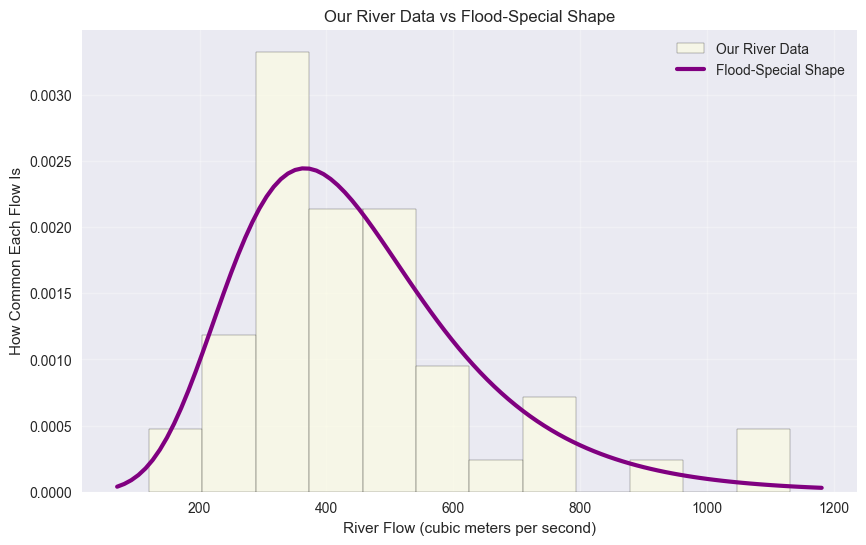

🤔 How does this purple line look?
Gumbel is often the best for flood analysis!


In [46]:
# Try the Gumbel (flood-special) recipe
gumbel_recipe = stats.gumbel_r.fit(flows)
gumbel_location, gumbel_scale = gumbel_recipe

print("🌊 TRYING THE FLOOD-SPECIAL SHAPE (GUMBEL)")
print("=" * 40)
print("This shape is made specially for floods and extreme events!")

# Make the graph
plt.figure(figsize=(10, 6))

# Our data as bars
plt.hist(flows, bins=12, alpha=0.6, color='lightyellow', edgecolor='black', 
         density=True, label='Our River Data')

# Create smooth curve for Gumbel shape
gumbel_curve = stats.gumbel_r.pdf(x_smooth, gumbel_location, gumbel_scale)
plt.plot(x_smooth, gumbel_curve, 'purple', linewidth=3, label='Flood-Special Shape')

plt.xlabel('River Flow (cubic meters per second)')
plt.ylabel('How Common Each Flow Is')
plt.title('Our River Data vs Flood-Special Shape')
plt.legend()
plt.grid(True, alpha=0.3)
plt.show()

print("🤔 How does this purple line look?")
print("Gumbel is often the best for flood analysis!")

## Step 10: Compare All Three Shapes 🏆

Let's put all three shapes on one graph to see which one matches our data best!

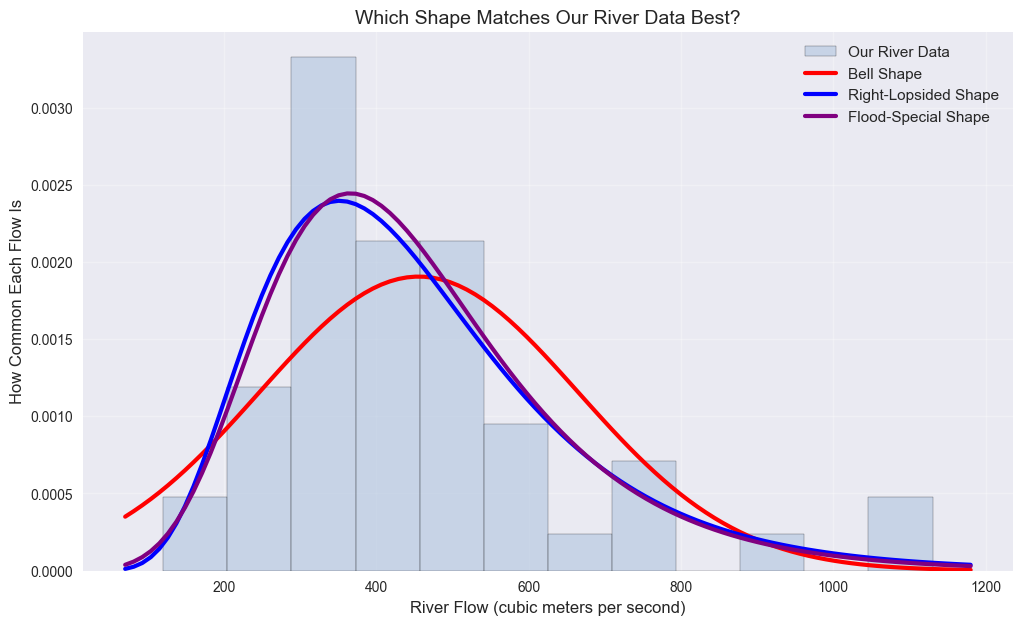

👀 LOOK AT THE GRAPH ABOVE:
• Which colored line follows the blue bars most closely?
• Which line captures the 'tail' on the right (high flows) best?

💡 For most river flood data, the purple line (Gumbel) usually wins!


In [47]:
# Show all three shapes together
plt.figure(figsize=(12, 7))

# Our data as bars
plt.hist(flows, bins=12, alpha=0.6, color='lightsteelblue', edgecolor='black', 
         density=True, label='Our River Data')

# All three curves
plt.plot(x_smooth, normal_curve, 'r-', linewidth=3, label='Bell Shape')
plt.plot(x_smooth, lognorm_curve, 'b-', linewidth=3, label='Right-Lopsided Shape')
plt.plot(x_smooth, gumbel_curve, 'purple', linewidth=3, label='Flood-Special Shape')

plt.xlabel('River Flow (cubic meters per second)', fontsize=12)
plt.ylabel('How Common Each Flow Is', fontsize=12)
plt.title('Which Shape Matches Our River Data Best?', fontsize=14)
plt.legend(fontsize=11)
plt.grid(True, alpha=0.3)
plt.show()

print("👀 LOOK AT THE GRAPH ABOVE:")
print("• Which colored line follows the blue bars most closely?")
print("• Which line captures the 'tail' on the right (high flows) best?")
print("\n💡 For most river flood data, the purple line (Gumbel) usually wins!")

## Step 11: Simple Test - Which Shape is Best? 🧪

Let's do a simple mathematical test to see which shape fits our data best. We'll use a test that gives us a score - **lower scores mean better fit**.

In [51]:
# Simple test: Calculate how well each shape fits
# We'll use a test called "Kolmogorov-Smirnov" - don't worry about the name!

print("🧪 SIMPLE MATH TEST: WHICH SHAPE FITS BEST?")
print("=" * 45)
print("Lower numbers = better fit\n")

# Let's find out which shape fits our data best!
# We'll give each shape a score - lower scores mean better fit
# Think of it like a test score where lower numbers are better

# Test the Bell Shape
# We use a special math tool (kstest) that compares our data to the Bell Shape
# This test compares our data (flows) to the Bell Shape (Normal distribution)
# stats.kstest() is a statistical test that measures how well two things match
# - First argument (flows): our actual river flow data
# - Second argument: a function that describes the Bell Shape we're comparing to
#   - lambda x: creates a small function that takes x as input 
#   - stats.norm.cdf(): gives the cumulative probability for the Bell Shape
#   - normal_average and normal_spread: the parameters we calculated earlier
test_result = stats.kstest(flows, 
                          lambda x: stats.norm.cdf(x, normal_average, normal_spread))
score_normal = test_result.statistic  # Get just the score number

# Test the Right-Lopsided Shape 
# Same test, but now comparing to the Right-Lopsided Shape
test_result = stats.kstest(flows, 
                          lambda x: stats.lognorm.cdf(x, lognorm_shape, 
                                                     loc=lognorm_location, 
                                                     scale=lognorm_scale))
score_lognorm = test_result.statistic  # Get just the score number

# Test the Flood-Special Shape
# One more time, comparing to the Flood-Special Shape
test_result = stats.kstest(flows, 
                          lambda x: stats.gumbel_r.cdf(x, gumbel_location, gumbel_scale))
score_gumbel = test_result.statistic  # Get just the score number

# Note: Don't worry about understanding the exact math!
# The important part is that we're comparing each shape to our data
# and getting a score that tells us how well they match

print(f"Bell Shape score:           {score_normal:.4f}")
print(f"Right-Lopsided Shape score: {score_lognorm:.4f}")
print(f"Flood-Special Shape score:  {score_gumbel:.4f}")

🧪 SIMPLE MATH TEST: WHICH SHAPE FITS BEST?
Lower numbers = better fit

Bell Shape score:           0.1563
Right-Lopsided Shape score: 0.0791
Flood-Special Shape score:  0.0753


In [52]:
best_shape = "gumbell"

## Step 12: Understanding Probabilities with CDF 📈

Now let's learn how to calculate **exact probabilities** using our fitted distribution! We'll use the **Cumulative Distribution Function (CDF)** which tells us the probability that a random value will be **less than or equal to** a certain number.

For example: "What's the chance that next year's flood will be less than 600 m³/s?"

Let's start with our best shape and show the CDF curve first!

In [55]:
# Step 1: Get CDF function for best shape
def get_cdf_function():
    """Returns the CDF function for the best fitted distribution"""
    if best_shape == 'gumbel':
        return lambda x: stats.gumbel_r.cdf(x, gumbel_location, gumbel_scale)
    elif best_shape == 'lognorm':
        return lambda x: stats.lognorm.cdf(x, lognorm_shape, loc=lognorm_location, scale=lognorm_scale)
    else:  # normal
        return lambda x: stats.norm.cdf(x, normal_average, normal_spread)

# Get the CDF function
cdf_func = get_cdf_function()

# Step 2: Use the CDF to get probabilities
flow_value = 600  # Change this to any flow value you want

# Calculate probabilities
prob_less_than = cdf_func(flow_value)        # P(X ≤ flow_value)
prob_greater_than = 1 - prob_less_than       # P(X ≥ flow_value)

print("🌊 SIMPLE PROBABILITY CALCULATION")
print("=" * 35)
print(f"Flow threshold: {flow_value} m³/s")
print(f"P(X ≤ {flow_value}): {prob_less_than:.3f} ({prob_less_than*100:.1f}%)")
print(f"P(X ≥ {flow_value}): {prob_greater_than:.3f} ({prob_greater_than*100:.1f}%)")

🌊 SIMPLE PROBABILITY CALCULATION
Flow threshold: 600 m³/s
P(X ≤ 600): 0.753 (75.3%)
P(X ≥ 600): 0.247 (24.7%)


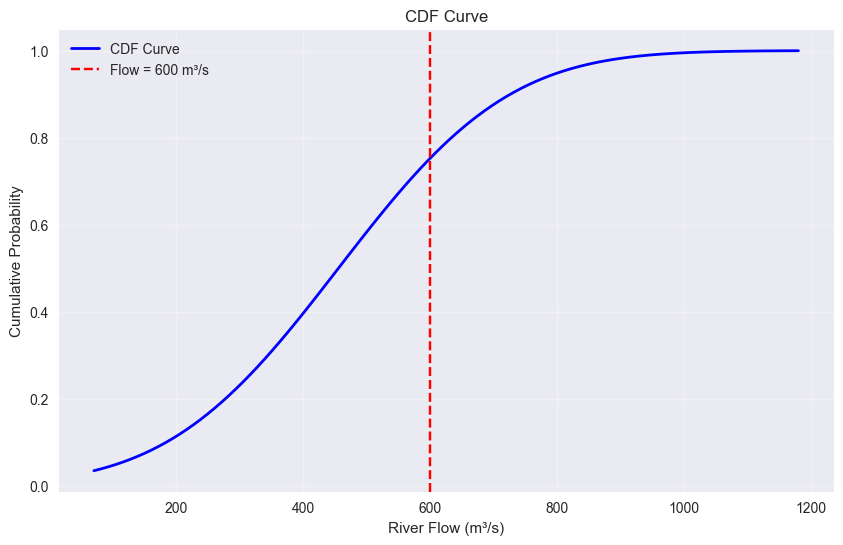

In [56]:
# Optional: Quick plot of the CDF curve
x_values = np.linspace(flows.min()-50, flows.max()+50, 100)
cdf_values = [cdf_func(x) for x in x_values]

plt.figure(figsize=(10, 6))
plt.plot(x_values, cdf_values, 'b-', linewidth=2, label='CDF Curve')
plt.axvline(flow_value, color='red', linestyle='--', label=f'Flow = {flow_value} m³/s')
plt.xlabel('River Flow (m³/s)')
plt.ylabel('Cumulative Probability')
plt.title('CDF Curve')
plt.legend()
plt.grid(True, alpha=0.3)
plt.show()

## 🌊 Return Period to Flow Calculator

This code calculates the **flow value** for a given **return period** using your best fitted distribution.

**Example**: "What's the 100-year flood flow?" or "What's the 50-year flood flow?"

### How it works:
- Return period R = 1 / (probability of exceedance per year)
- 100-year flood = 1% chance each year of being exceeded
- Uses inverse CDF (PPF) to find the flow value

In [57]:
# Step 1: Set your return period (in years)
return_period = 100  # Change this number! Try 50, 25, 10, etc.

# Step 2: Convert return period to probability
prob_exceedance = 1.0 / return_period  # Chance of flood each year
prob_non_exceedance = 1 - prob_exceedance  # Chance of NO flood each year

print(f"Return period: {return_period} years")
print(f"Probability of exceedance: {prob_exceedance:.3f} ({prob_exceedance*100:.1f}%)")
print(f"Probability of non-exceedance: {prob_non_exceedance:.3f} ({prob_non_exceedance*100:.1f}%)")
print()

# Step 3: Calculate flow value using inverse CDF (PPF)
if best_shape == 'gumbel':
    flow_value = stats.gumbel_r.ppf(prob_non_exceedance, gumbel_location, gumbel_scale)
    shape_name = 'Gumbel'
elif best_shape == 'lognorm':
    flow_value = stats.lognorm.ppf(prob_non_exceedance, lognorm_shape, loc=lognorm_location, scale=lognorm_scale)
    shape_name = 'Log-Normal'
else:  # normal
    flow_value = stats.norm.ppf(prob_non_exceedance, normal_average, normal_spread)
    shape_name = 'Normal'

# Step 4: Show the result
print("🎯 RESULT:")
print(f"Using {shape_name} distribution:")
print(f"A {return_period}-year flood has a flow of {flow_value:.0f} m³/s")
print(f"This means there's a {prob_exceedance*100:.1f}% chance each year of exceeding this flow")

Return period: 100 years
Probability of exceedance: 0.010 (1.0%)
Probability of non-exceedance: 0.990 (99.0%)

🎯 RESULT:
Using Normal distribution:
A 100-year flood has a flow of 948 m³/s
This means there's a 1.0% chance each year of exceeding this flow
